In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("C:/Users/rezan/OneDrive/Documents/Fall 2024/Capstone/Illinois_10_years_data.csv")

In [14]:
df.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Origin_State_Name,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1.0,2.0,AA,N359AA,13930.0,ORD,Illinois,...,260.0,15.0,0.0,30.0,1014.2,10.0,SCT,22000.0,40.28,0.0
1,2014,2,4,1.0,2.0,AA,N3ADAA,13930.0,ORD,Illinois,...,260.0,24.0,0.0,30.0,1008.9,10.0,SCT,2800.0,20.44,0.0
2,2014,2,4,1.0,2.0,AA,N3AKAA,13930.0,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,SCT,4300.0,55.04,0.0
3,2014,2,4,1.0,2.0,AA,N3AKAA,13930.0,ORD,Illinois,...,250.0,20.0,0.0,30.0,1011.5,10.0,OVC,2600.0,21.74,0.0
4,2014,2,4,1.0,2.0,AA,N3ANAA,13930.0,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,CLR,4700.0,55.26,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 31 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int64  
 1   Quarter                           int64  
 2   Month                             int64  
 3   Day_of_Month                      float64
 4   Day_of_Week                       float64
 5   Operating_Carrier_Code            object 
 6   Tail_Number                       object 
 7   Origin_Airport_ID                 float64
 8   Origin_Airport_Code               object 
 9   Origin_State_Name                 object 
 10  Destination_Airport_Code          object 
 11  Destination_State_Name            object 
 12  Scheduled_Departure_Time          float64
 13  Departure_Delay_Minutes           float64
 14  Taxi_Out_Time_Minutes             float64
 15  Flight_Distance_Miles             float64
 16  Departure_Datetime                ob

In [16]:
df.isna().sum()

Year                                0
Quarter                             0
Month                               0
Day_of_Month                        0
Day_of_Week                         0
Operating_Carrier_Code              0
Tail_Number                         0
Origin_Airport_ID                   0
Origin_Airport_Code                 0
Origin_State_Name                   0
Destination_Airport_Code            0
Destination_State_Name              0
Scheduled_Departure_Time            0
Departure_Delay_Minutes             0
Taxi_Out_Time_Minutes               0
Flight_Distance_Miles               0
Departure_Datetime                  0
Scheduled_Departure_Time_Minutes    0
Air_Temperature_Fahrenheit          0
Dew_Point_Temperature_Fahrenheit    0
Relative_Humidity_Percent           0
Wind_Direction_Degrees              0
Wind_Speed_Knots                    0
Hourly_Precipitation_Inches         0
Pressure_Altimeter_Inches           0
Sea_Level_Pressure_Millibar         0
Visibility_M

In [17]:
df.dropna(inplace= True)

In [18]:
# Convert integer features to int32
int_columns = [
    'Year', 
    'Quarter', 
    'Month', 
    'Day_of_Month', 
    'Day_of_Week', 
    'Scheduled_Departure_Time', 
    'Scheduled_Departure_Time_Minutes',
    'Target'
]

for col in int_columns:
    df[col] = df[col].astype(np.int32)

# Convert continuous numeric features to float32
float_columns = [
    'Departure_Delay_Minutes',
    'Taxi_Out_Time_Minutes',
    'Flight_Distance_Miles',
    'Air_Temperature_Fahrenheit',
    'Dew_Point_Temperature_Fahrenheit',
    'Relative_Humidity_Percent',
    'Wind_Direction_Degrees',
    'Wind_Speed_Knots',
    'Hourly_Precipitation_Inches',
    'Pressure_Altimeter_Inches',
    'Sea_Level_Pressure_Millibar',
    'Visibility_Miles',
    'Sky_Level_1_Altitude_Feet',
    'Apparent_Temperature_Fahrenheit',
    
]

for col in float_columns:
    df[col] = df[col].astype(np.float32)

# Convert categorical features to 'category' dtype
categorical_columns = [
    'Operating_Carrier_Code',
    'Tail_Number',
    'Origin_Airport_ID',
    'Origin_Airport_Code',
    'Origin_State_Name',
    'Destination_Airport_Code',
    'Destination_State_Name',
    'Sky_Cover_Level_1'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [19]:
df = df.drop([ 'Origin_State_Name','Departure_Datetime','Departure_Delay_Minutes'], axis=1)

In [35]:
df_without_categorical = df
df_without_categorical.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1,2,AA,N359AA,13930.0,ORD,DFW,...,260.0,15.0,0.0,30.0,1014.200012,10.0,SCT,22000.0,40.279999,0
1,2014,2,4,1,2,AA,N3ADAA,13930.0,ORD,LAS,...,260.0,24.0,0.0,30.0,1008.900024,10.0,SCT,2800.0,20.440001,0
2,2014,2,4,1,2,AA,N3AKAA,13930.0,ORD,MIA,...,220.0,15.0,0.0,30.0,1004.200012,10.0,SCT,4300.0,55.040001,0
3,2014,2,4,1,2,AA,N3AKAA,13930.0,ORD,SEA,...,250.0,20.0,0.0,30.0,1011.500000,10.0,OVC,2600.0,21.740000,0
4,2014,2,4,1,2,AA,N3ANAA,13930.0,ORD,LAX,...,220.0,15.0,0.0,30.0,1004.200012,10.0,CLR,4700.0,55.259998,0


In [36]:
df_without_categorical = df_without_categorical.drop(columns=df_without_categorical.select_dtypes(include=['category']).columns)


In [37]:
df_without_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 21 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int32  
 1   Quarter                           int32  
 2   Month                             int32  
 3   Day_of_Month                      int32  
 4   Day_of_Week                       int32  
 5   Scheduled_Departure_Time          int32  
 6   Taxi_Out_Time_Minutes             float32
 7   Flight_Distance_Miles             float32
 8   Scheduled_Departure_Time_Minutes  int32  
 9   Air_Temperature_Fahrenheit        float32
 10  Dew_Point_Temperature_Fahrenheit  float32
 11  Relative_Humidity_Percent         float32
 12  Wind_Direction_Degrees            float32
 13  Wind_Speed_Knots                  float32
 14  Hourly_Precipitation_Inches       float32
 15  Pressure_Altimeter_Inches         float32
 16  Sea_Level_Pressure_Millibar       fl

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 28 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   Year                              int32   
 1   Quarter                           int32   
 2   Month                             int32   
 3   Day_of_Month                      int32   
 4   Day_of_Week                       int32   
 5   Operating_Carrier_Code            category
 6   Tail_Number                       category
 7   Origin_Airport_ID                 category
 8   Origin_Airport_Code               category
 9   Destination_Airport_Code          category
 10  Destination_State_Name            category
 11  Scheduled_Departure_Time          int32   
 12  Taxi_Out_Time_Minutes             float32 
 13  Flight_Distance_Miles             float32 
 14  Scheduled_Departure_Time_Minutes  int32   
 15  Air_Temperature_Fahrenheit        float32 
 16  Dew_Point_Temperat

In [21]:
df['Year'].value_counts()

2019    426951
2020    420073
2015    395345
2014    362592
2017    301209
2023    300540
2016    292813
2021    254563
2018    166021
2024     25193
2022     24637
Name: Year, dtype: int64

In [39]:
df1= df_without_categorical[df_without_categorical['Month'] == 1]


In [40]:
# Define the years for each dataset
train_years = [2014, 2015, 2016, 2017, 2018, 2019]
val_years = [2020, 2021, 2022]
test_years = [2023, 2024]

# Ensure the 'Year' column is of integer type
df1['Year'] = df1['Year'].astype(int)

# Create the training set
train_df = df1[df1['Year'].isin(train_years)].reset_index(drop=True)

# Create the validation set
val_df = df1[df1['Year'].isin(val_years)].reset_index(drop=True)

# Create the test set
test_df = df1[df1['Year'].isin(test_years)].reset_index(drop=True)


C:\Users\rezan\AppData\Local\Temp\ipykernel_7892\2125162217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['Year'].astype(int)


In [41]:
train_df['Year'].value_counts()

2018    32116
2019    30290
2015    30099
2017    25477
2016    25412
2014    15129
Name: Year, dtype: int64

In [42]:
train_df.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Scheduled_Departure_Time,Taxi_Out_Time_Minutes,Flight_Distance_Miles,Scheduled_Departure_Time_Minutes,Air_Temperature_Fahrenheit,...,Relative_Humidity_Percent,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,1,1,1,3,1715,28.0,1197.0,1035,21.00,...,77.449997,60.0,14.0,0.020000,30.0,1025.099976,0.625,1200.0,7.26,1
1,2014,1,1,1,3,1100,22.0,4243.0,660,14.25,...,79.980003,350.0,7.0,0.000000,30.0,1025.099976,7.750,1300.0,3.17,1
2,2014,1,1,1,3,1520,24.0,867.0,920,21.00,...,77.449997,70.0,12.0,0.026667,30.0,1025.699951,0.750,1300.0,8.03,1
3,2014,1,1,1,3,1900,19.0,1182.0,1140,21.00,...,77.449997,50.0,11.0,0.027500,30.0,1024.099976,0.750,1400.0,8.45,1
4,2014,1,1,1,3,905,24.0,1197.0,545,12.50,...,79.830002,270.0,8.0,0.001250,30.0,1025.500000,6.000,1200.0,0.34,1


In [43]:


y_train = train_df['Target']


train_df = train_df.drop(columns=['Target'])

In [44]:
y_val = val_df['Target']


val_df = val_df.drop(columns=['Target'])

In [45]:
y_test = test_df['Target']


test_df = test_df.drop(columns=['Target'])

In [46]:
from sklearn.tree import DecisionTreeClassifier

jan_clf = DecisionTreeClassifier(class_weight = 'balanced', random_state = 24 )
jan_clf.fit(train_df, y_train)
        

DecisionTreeClassifier(class_weight='balanced', random_state=24)

In [57]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),  
    'max_depth': list(range(1, 7)),          
    'min_samples_split': [2,3, 4]   
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=24),
                              params,
                              cv=3)

grid_search_cv.fit(train_df, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [58]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, random_state=24)

In [59]:
from sklearn.metrics import accuracy_score


y_val_pred = grid_search_cv.best_estimator_.predict(val_df)


accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.82


In [64]:
y_test_pred = grid_search_cv.best_estimator_.predict(test_df)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.7200412813082999


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     18140
           1       0.00      0.00      0.00      7053

    accuracy                           0.72     25193
   macro avg       0.36      0.50      0.42     25193
weighted avg       0.52      0.72      0.60     25193



C:\Users\rezan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rezan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rezan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


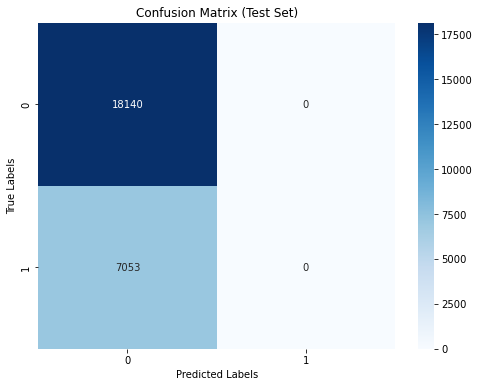

In [66]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()